In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [136]:
df = pd.read_csv("multiclass.csv")

In [137]:
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**24Seven** is a retail chain, which has different stores buying various products. Based on the purchase history we want to divide the stores into classes for better inventory management and customer handling.

**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **Region** | Region of the store (1: Less purchase 2: frequent purchase 3: high purchase|
|02| **Fresh** | How many fresh items are brought |
|03|**Milk**| How many units of Milk is purchased |
|04|**Grocery**|Units of Grocery bought for the store |
|05|**Frozen**|Frozen items purchased |
|06|**Detergents_Paper**|Unit of Detergents and paper bought |
|07|**Delicassen**|Food related items |
|08|**class**| Type/Category of the Store (1 ,2 , 3)|

In [138]:
df.shape

(440, 8)

In [139]:
df.isnull().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64

In [140]:
df.describe()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,2.195455
std,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.744289
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000
25%,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,2.000000
50%,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,2.000000
75%,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,3.000000
max,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,3.000000


In [141]:
# Check unique Regions and their counts
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [142]:
# Check unique classes and their counts
df['class'].value_counts()

class
2    180
3    173
1     87
Name: count, dtype: int64

**One-Hot Encode Regions and class** as both are **Categorical data**

In [143]:
region_col = df[['Region']]

# Initialize and apply encoder
encoder = OneHotEncoder(sparse_output=False)
region_encoded = encoder.fit_transform(region_col)

# Get column names and create a DataFrame
region_feature_names = encoder.get_feature_names_out(['Region'])
region_df = pd.DataFrame(region_encoded, columns=region_feature_names)

# Concatenate with original data
df = pd.concat([df.drop('Region', axis=1), region_df], axis=1)

class_col = df[['class']]

# Initialize and apply encoder
encoder = OneHotEncoder(sparse_output=False)
class_encoded = encoder.fit_transform(class_col)

# Get column names and create a DataFrame
class_feature_names = encoder.get_feature_names_out(['class'])
class_df = pd.DataFrame(class_encoded, columns=class_feature_names)

# Concatenate with original data
df = pd.concat([df.drop('class', axis=1), class_df], axis=1)

In [144]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,0.0,0.0,1.0,0.0,1.0,0.0
1,7057,9810,9568,1762,3293,1776,0.0,0.0,1.0,0.0,1.0,0.0
2,6353,8808,7684,2405,3516,7844,0.0,0.0,1.0,0.0,1.0,0.0
3,13265,1196,4221,6404,507,1788,0.0,0.0,1.0,1.0,0.0,0.0
4,22615,5410,7198,3915,1777,5185,0.0,0.0,1.0,1.0,0.0,0.0


In [145]:
X = df.drop(columns=['class_1','class_2','class_3'])
y = df[['class_1','class_2','class_3']]

**Visualizing the data using PCA**

In [146]:
from sklearn.decomposition import PCA

# reducing features to just 2 features
pca = PCA(n_components=2)
visual_1 = pca.fit_transform(X)
visual_1.shape

(440, 2)

[0.45961362 0.40517227]


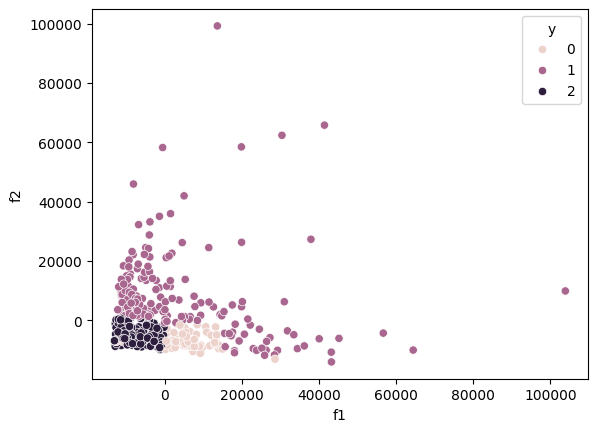

In [147]:
df2 = pd.DataFrame(visual_1, columns=['f1', 'f2'])
df2['y'] = np.argmax(y.values, axis=1)  # converts: [1, 0, 0] → 0 (class 1), [0, 1, 0] → 1 (class 2), [0, 0, 1] → 2 (class 3)
print(pca.explained_variance_ratio_)
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

**Observation**

Data is not linearly separable. Hence, best strategy would be to use Deep Neural Network

**Splitting Data into Train, Validation and Test Data**

In [148]:
from sklearn.model_selection import train_test_split

# 90% Train+Val → X_train_val, y_train_val # 10% Test set → X_test, y_test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 

# 90% Train → X_train, y_train (i.e., 81% of original data) # 10% Validation → X_val, y_val (i.e., 9% of original data)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


**Standardizing the data**

Standardization rescales all features so that they have:

* Mean = 0
* Standard deviation = 1

This helps:

* Speed up model convergence
* Avoid domination by features with larger scales
* Improve performance for models like neural networks

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [156]:
np.mean(X_train, axis=0)

array([ 5.98771968e-17,  1.24744160e-17, -4.98976640e-18,  1.99590656e-17,
        1.49692992e-17,  1.74641824e-17,  2.49488320e-17,  1.49692992e-17,
        1.19754394e-16])

In [158]:
# Above values are close to 0

In [159]:
np.std(X_train, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Why fit_transform on X_train and only transform on X_val / X_test?

--> Because on X_train, we learn and apply scaling.
X_val & X_test - Reuse training mean/std